<b> Term Project ICS485   
 Name: Abdulmohsen Alotaibi                                                     
 ID:201846560<b>     

In [47]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import norm,boxcox
from scipy import stats 
from sklearn.preprocessing import StandardScaler ,MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier

In [48]:
df = pd.read_csv("Dataset-vf (1).csv",delimiter=",")
display(df.head(10))
print(df.info())
display(df.describe())

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,2709,59.0,11,120,43,150,228,217,120,2114,0.66,269,FC11,CA49,R1,Melon
1,2802,54.0,7,0,0,693,224,225,136,162,0.35,195,FC11,CA50,NaN,Melon
2,2325,28.0,12,0,0,1260,215,213,133,162,0.89,750,FC14,CA26,NaN,Carrot
3,2837,112.0,8,272,16,3649,235,231,128,6221,0.27,-155,FC11,CA32,NaN,Orange
4,2509,59.0,7,134,10,900,226,226,134,5184,0.93,88,FC11,CA38,NaN,Melon
5,2892,75.0,7,95,9,1889,228,228,133,2371,0.79,39,FC13,CA42,NaN,Apple
6,2848,NaN,15,819,91,2190,181,245,203,1717,0.98,-408,FC13,CA37,NaN,Melon
7,2380,130.0,27,228,139,300,252,212,69,1855,0.51,231,FC14,CA23,NaN,Carrot
8,3208,0.0,9,124,-2,5394,206,222,154,900,0.97,-740,FC11,CA42,R2,Apple
9,2273,357.0,12,30,3,658,201,218,155,698,0.48,648,FC14,CA24,NaN,Berry


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6374 non-null   int64  
 1   X2      5747 non-null   float64
 2   X3      6374 non-null   int64  
 3   X4      6374 non-null   int64  
 4   X5      6374 non-null   int64  
 5   X6      6374 non-null   int64  
 6   X7      6374 non-null   int64  
 7   X8      6374 non-null   int64  
 8   X9      6374 non-null   int64  
 9   X10     6374 non-null   int64  
 10  X11     6374 non-null   float64
 11  X12     6374 non-null   int64  
 12  X13     6374 non-null   object 
 13  X14     6374 non-null   object 
 14  X15     631 non-null    object 
 15  Y       6374 non-null   object 
dtypes: float64(2), int64(10), object(4)
memory usage: 796.9+ KB
None


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,6374.000000,5747.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,2635.858958,153.239603,17.059617,191.487292,47.864920,1515.537182,215.191246,218.024318,130.301224,1425.017728,0.494167,6.786476
std,394.715236,105.619123,9.008995,177.839135,57.640187,1281.423405,31.643570,23.850334,49.012495,1109.522425,0.291627,573.926918
min,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,-1000.000000
25%,2282.000000,69.000000,10.000000,42.000000,2.000000,624.000000,200.000000,206.000000,98.000000,663.000000,0.240000,-492.000000
50%,2686.000000,123.000000,16.000000,150.000000,28.000000,1150.000000,223.000000,222.000000,135.000000,1168.000000,0.490000,21.500000
75%,2919.000000,242.000000,24.000000,295.000000,78.000000,1959.000000,238.750000,235.000000,165.000000,1852.000000,0.750000,495.750000
max,3675.000000,360.000000,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1000.000000


In [49]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

O_encoder = OrdinalEncoder()
O_encoder.fit(df[["X13","X14"]])
df[["X13","X14"]]= O_encoder.transform(df[["X13","X14"]])
L_encoder = LabelEncoder()
L_encoder.fit(df["Y"])
df["Y"] = L_encoder.transform(df["Y"])


In [50]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

X_train , X_test , Y_train, Y_test = train_test_split(x,y,test_size=0.20,random_state=0)







In [51]:
df_train = pd.DataFrame(X_train)

mode_train = df_train[1].mode()[0]

mode_train

45.0

In [52]:
df_train[1] = df_train[1].fillna(mode_train)
df_train.head(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2368,3.0,18,90,57,1142,193,203,145,1106,0.62,566,3.0,6.0,NaN
1,2801,111.0,31,124,59,2216,254,189,37,430,0.8,-406,2.0,9.0,NaN
2,2589,192.0,26,150,61,1040,208,249,160,1348,0.84,-249,2.0,3.0,R3
3,2135,182.0,8,0,0,1308,223,246,156,1325,0.49,-640,3.0,12.0,NaN
4,2059,128.0,22,0,0,841,250,220,87,228,0.71,323,3.0,0.0,NaN
5,3366,352.0,5,30,2,2713,211,231,158,2298,0.36,211,0.0,29.0,NaN
6,2782,98.0,22,190,107,1343,249,202,70,895,0.82,-984,2.0,9.0,NaN
7,2588,36.0,15,30,10,1262,218,207,121,1914,0.21,-980,2.0,9.0,NaN
8,2847,91.0,33,210,122,2047,249,171,24,474,0.99,-291,2.0,9.0,NaN
9,2114,45.0,19,0,0,1218,175,211,173,1140,0.29,260,3.0,12.0,NaN


In [54]:
df_test = pd.DataFrame(X_test)

df_test[1] = df_test[1].fillna(mode_train)

In [55]:
df_train = df_train.dropna(axis=1)
df_test = df_test.dropna(axis=1)
display(df_train.head(30))
display(df_test.head(30))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2368,3.0,18,90,57,1142,193,203,145,1106,0.62,566,3.0,6.0
1,2801,111.0,31,124,59,2216,254,189,37,430,0.8,-406,2.0,9.0
2,2589,192.0,26,150,61,1040,208,249,160,1348,0.84,-249,2.0,3.0
3,2135,182.0,8,0,0,1308,223,246,156,1325,0.49,-640,3.0,12.0
4,2059,128.0,22,0,0,841,250,220,87,228,0.71,323,3.0,0.0
5,3366,352.0,5,30,2,2713,211,231,158,2298,0.36,211,0.0,29.0
6,2782,98.0,22,190,107,1343,249,202,70,895,0.82,-984,2.0,9.0
7,2588,36.0,15,30,10,1262,218,207,121,1914,0.21,-980,2.0,9.0
8,2847,91.0,33,210,122,2047,249,171,24,474,0.99,-291,2.0,9.0
9,2114,45.0,19,0,0,1218,175,211,173,1140,0.29,260,3.0,12.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3112,45.0,23,408,97,4563,233,186,72,3084,0.35,-593,0.0,22.0
1,2836,238.0,17,192,71,2181,187,252,200,732,0.09,143,2.0,24.0
2,2165,53.0,5,0,0,1358,223,229,142,579,0.23,888,3.0,10.0
3,2157,190.0,19,0,0,1075,217,251,160,824,0.94,646,3.0,12.0
4,2274,112.0,27,201,63,616,254,200,55,1676,0.07,103,3.0,2.0
5,2122,129.0,19,30,7,1155,247,226,99,1406,0.19,39,3.0,12.0
6,2317,116.0,11,228,55,95,240,229,118,162,0.43,-593,3.0,7.0
7,2805,347.0,13,350,87,1825,196,219,162,994,0.25,237,2.0,7.0
8,2815,91.0,9,30,-5,808,235,226,122,162,0.42,-634,0.0,22.0
9,3220,271.0,13,42,6,3178,186,244,197,1400,0.04,-51,2.0,18.0


In [56]:
X_train = np.array(df_train)
X_test = np.array(df_test)

print(X_train)
print(X_test)

[[2368 3.0 18 ... 566 3.0 6.0]
 [2801 111.0 31 ... -406 2.0 9.0]
 [2589 192.0 26 ... -249 2.0 3.0]
 ...
 [2768 88.0 32 ... 246 0.0 23.0]
 [2368 357.0 15 ... -672 3.0 5.0]
 [3202 42.0 7 ... -806 2.0 24.0]]
[[3112 45.0 23 ... -593 0.0 22.0]
 [2836 238.0 17 ... 143 2.0 24.0]
 [2165 53.0 5 ... 888 3.0 10.0]
 ...
 [2701 69.0 7 ... 347 2.0 24.0]
 [3227 31.0 24 ... -837 0.0 17.0]
 [2319 37.0 22 ... -115 3.0 5.0]]


In [57]:
Standard_S = StandardScaler()
Standard_S.fit(X_train)
X_train_standard = Standard_S.transform(X_train)
X_test_standard = Standard_S.transform(X_test)


<h3> Handling missing Values</h3>

In [3]:
total_nan = df.isnull().sum().sort_values()
display(total_nan)



X1        0
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
X12       0
X13       0
X14       0
Y         0
X2      627
X15    5743
dtype: int64

0.5420291030743629


/Users/mohsen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


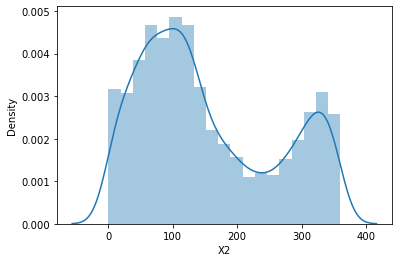

In [7]:
sns.distplot(df["X2"])
print(df["X2"].skew())



X2: a few data is missing here so i will fill it with the mode since the std is high and we do not want to affect it 

X15: Since 90% of X15 is missing dropping the column is most appropriate choice here.

In [8]:

df["X2"] = df["X2"].fillna(df["X2"].mode()[0])
df = df.dropna(axis=1)
df["X2"].describe()

count    6374.000000
mean      142.592250
std       105.343014
min         0.000000
25%        51.000000
50%       111.000000
75%       219.000000
max       360.000000
Name: X2, dtype: float64

In [9]:
total_nan = df.isnull().sum().sort_values()
display(total_nan)

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
Y      0
dtype: int64

<h3> Correlation Analysis</h3>

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
X1,1.000000,NaN,NaN,NaN,NaN,0.606769,NaN,NaN,NaN,NaN,NaN,NaN
X2,NaN,1.000000,NaN,NaN,NaN,NaN,-0.531464,NaN,0.565918,NaN,NaN,NaN
X3,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,-0.656795,NaN,NaN,NaN,NaN
X4,NaN,NaN,NaN,1.000000,0.624466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5,NaN,NaN,NaN,0.624466,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X6,0.606769,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
X7,NaN,-0.531464,NaN,NaN,NaN,NaN,1.000000,NaN,-0.776999,NaN,NaN,NaN
X8,NaN,NaN,-0.656795,NaN,NaN,NaN,NaN,1.000000,0.637684,NaN,NaN,NaN
X9,NaN,0.565918,NaN,NaN,NaN,NaN,-0.776999,0.637684,1.000000,NaN,NaN,NaN
X10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


<AxesSubplot:>

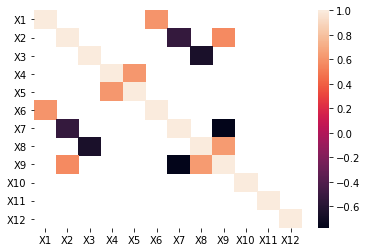

In [10]:
#for numeric columns
numirec_columns = df.select_dtypes(include=["int64","float64"])
num_corr = numirec_columns.corr()
top_features = num_corr[abs(num_corr) > 0.5]
display(top_features)
sns.heatmap(top_features)

In [11]:
#for catagorical columns 
cata_col = df.select_dtypes(include='object')
for col in cata_col.columns:
     print(cata_col[col].unique())
    #print(cata_col[col].value_counts())

[' FC11' ' FC14' ' FC13' ' FC12']
[' CA49' ' CA50' ' CA26' ' CA32' ' CA38' ' CA42' ' CA37' ' CA23' ' CA24'
 ' CA21' ' CA43' ' CA22' ' CA36' ' CA33' ' CA44' ' CA59' ' CA30' ' CA40'
 ' CA51' ' CA52' ' CA31' ' CA58' ' CA25' ' CA39' ' CA53' ' CA60' ' CA46'
 ' CA54' ' CA34' ' CA41' ' CA48' ' CA55']
['Melon' 'Carrot' 'Orange' 'Apple' 'Berry' 'Mango' 'Peach']


It seem like X13 , X14 are ordinal so i will use ordinal encoder and with the target Y i will use label encoder to perform correlation of all features with the target feature.

In [12]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

O_encoder = OrdinalEncoder()
O_encoder.fit(df[["X13","X14"]])
df[["X13","X14"]]= O_encoder.transform(df[["X13","X14"]])
L_encoder = LabelEncoder()
L_encoder.fit(df["Y"])
df["Y"] = L_encoder.transform(df["Y"])



Now i will do the Correlation again with the input features together i will also check the correlation of all featres with the target 

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
X1,1.000000,NaN,NaN,NaN,NaN,0.606769,NaN,NaN,NaN,NaN,NaN,NaN,0.763254,0.781874,NaN
X2,NaN,1.000000,NaN,NaN,NaN,NaN,0.531464,NaN,0.565918,NaN,NaN,NaN,NaN,NaN,NaN
X3,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.656795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X4,NaN,NaN,NaN,1.000000,0.624466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5,NaN,NaN,NaN,0.624466,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X6,0.606769,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.509542,NaN,NaN
X7,NaN,0.531464,NaN,NaN,NaN,NaN,1.000000,NaN,0.776999,NaN,NaN,NaN,NaN,NaN,NaN
X8,NaN,NaN,0.656795,NaN,NaN,NaN,NaN,1.000000,0.637684,NaN,NaN,NaN,NaN,NaN,NaN
X9,NaN,0.565918,NaN,NaN,NaN,NaN,0.776999,0.637684,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
X10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.563003,NaN,NaN


<AxesSubplot:>

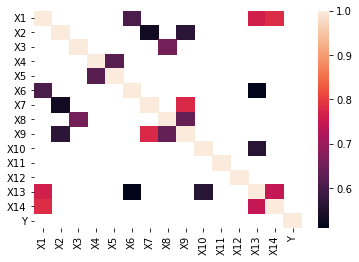

In [13]:
corr = abs(df.corr())
top_features = corr[abs(corr) > 0.5]
display(top_features)
sns.heatmap(top_features)

In [14]:

corr_target = df.corr()['Y'][:-1] # 
top_features = corr_target[abs(corr_target) > 0.5].sort_values(ascending=False) 
print("There is {} strongly correlated values with Y the target:\n{}".format(len(top_features), top_features))

There is 0 strongly correlated values with Y the target:
Series([], Name: Y, dtype: float64)


when we did OrdinalEncoder we can see there is a strong correlation from some of the Catagorical variables and numrical variables.

it seem there is no feature strongly correlated with Y the target.

<h3> Dataset analysis </h3>

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
count,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,2635.858958,142.592250,17.059617,191.487292,47.864920,1515.537182,215.191246,218.024318,130.301224,1425.017728,0.494167,6.786476,1.858174,12.355193,2.176341
std,394.715236,105.343014,9.008995,177.839135,57.640187,1281.423405,31.643570,23.850334,49.012495,1109.522425,0.291627,573.926918,1.235732,9.280789,1.704417
min,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,-1000.000000,0.000000,0.000000,0.000000
25%,2282.000000,51.000000,10.000000,42.000000,2.000000,624.000000,200.000000,206.000000,98.000000,663.000000,0.240000,-492.000000,0.000000,4.000000,1.000000
50%,2686.000000,111.000000,16.000000,150.000000,28.000000,1150.000000,223.000000,222.000000,135.000000,1168.000000,0.490000,21.500000,2.000000,9.000000,2.000000
75%,2919.000000,219.000000,24.000000,295.000000,78.000000,1959.000000,238.750000,235.000000,165.000000,1852.000000,0.750000,495.750000,3.000000,22.000000,4.000000
max,3675.000000,360.000000,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1000.000000,3.000000,31.000000,6.000000


<AxesSubplot:xlabel='Y', ylabel='Count'>

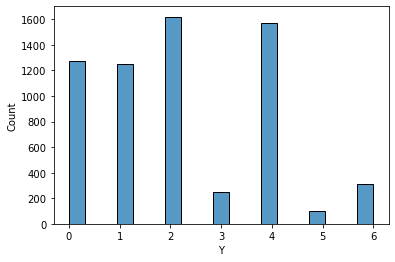

In [15]:
display(df.describe())
sns.histplot(df["Y"])


it seem that the target variable is not uniform for all classes so we might need to balance the dataset. 

<AxesSubplot:>

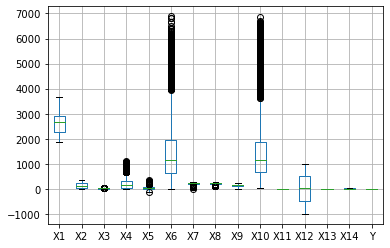

In [16]:
df.boxplot()


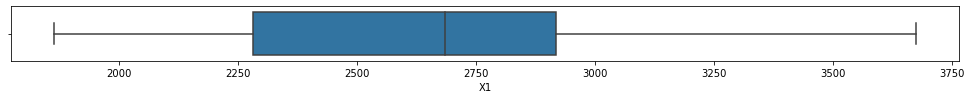

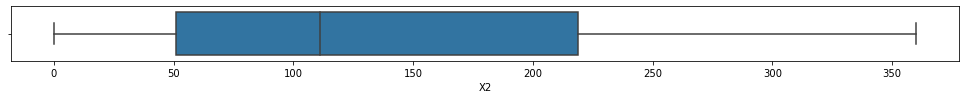

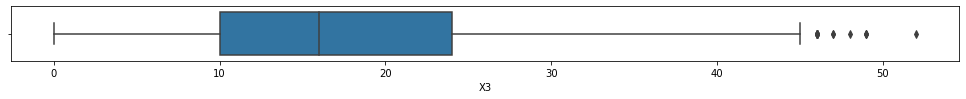

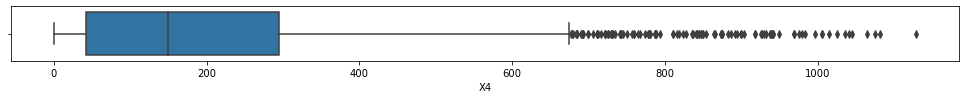

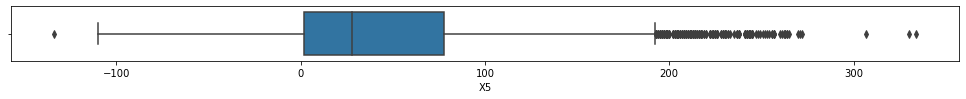

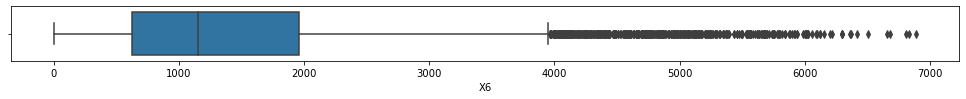

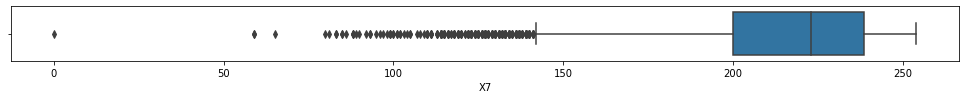

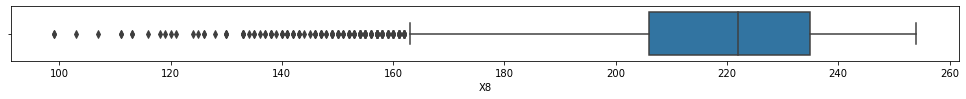

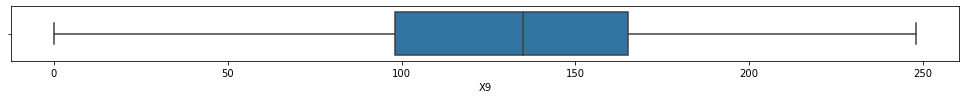

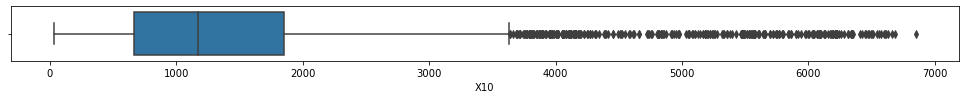

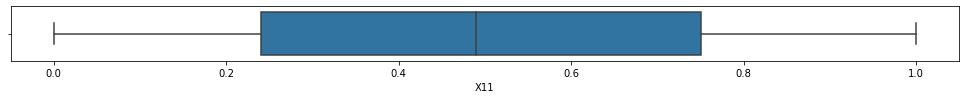

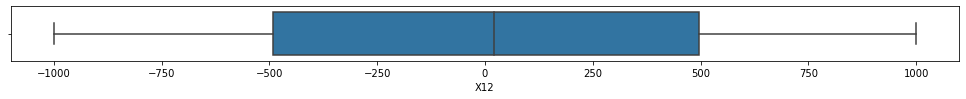

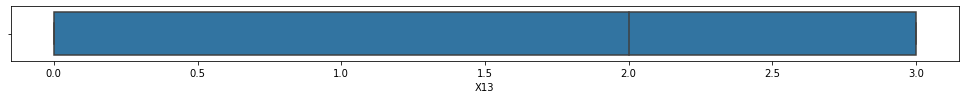

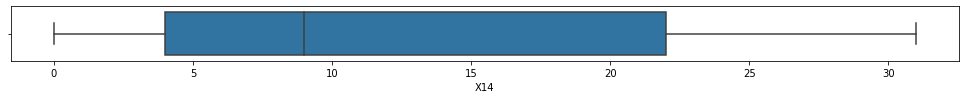

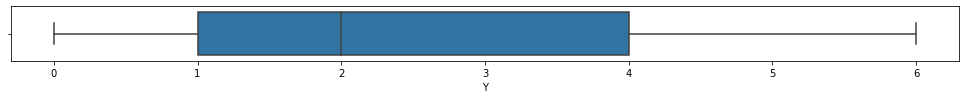

In [17]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)
        



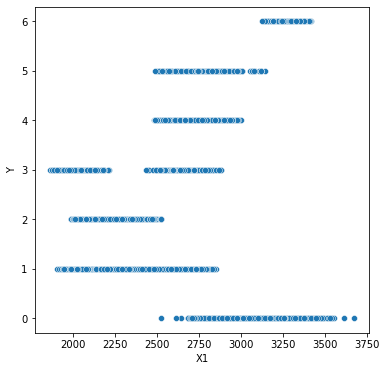

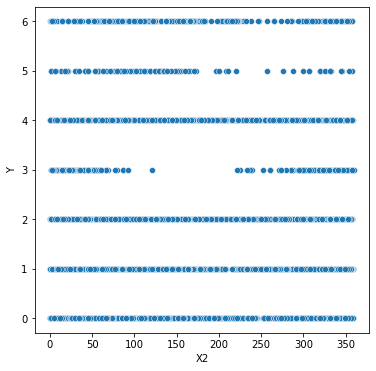

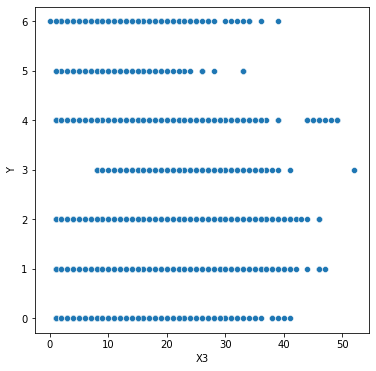

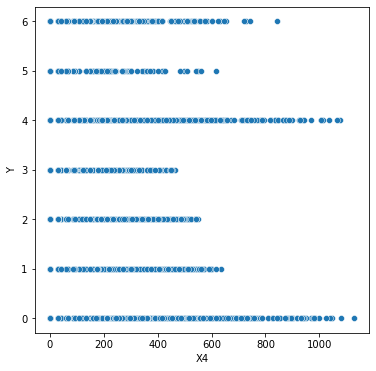

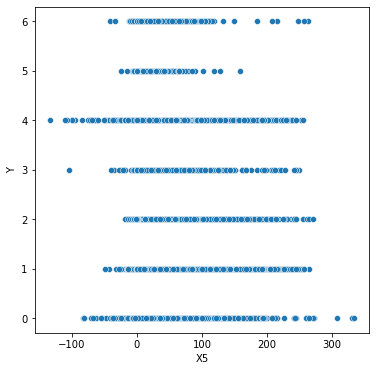

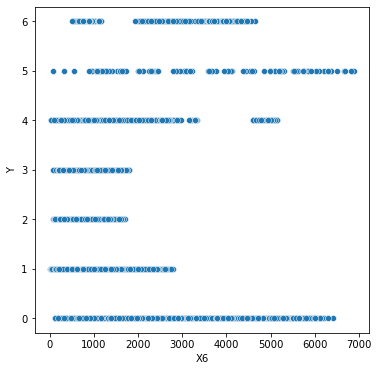

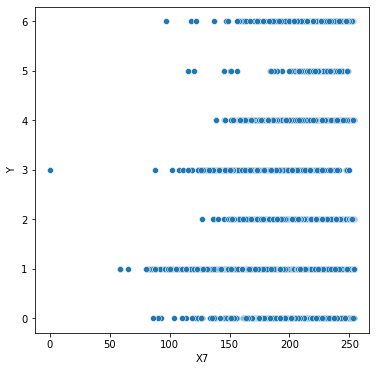

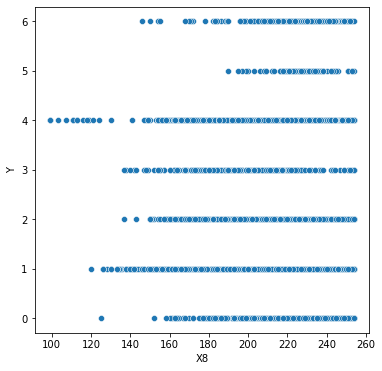

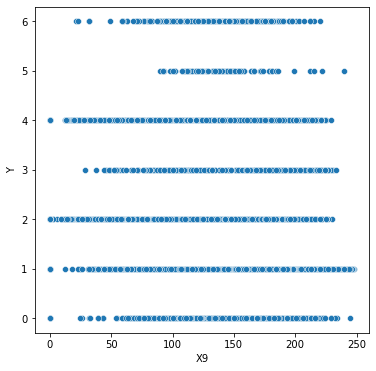

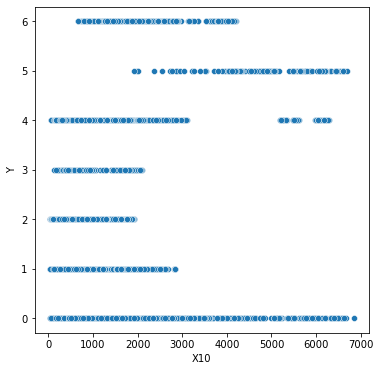

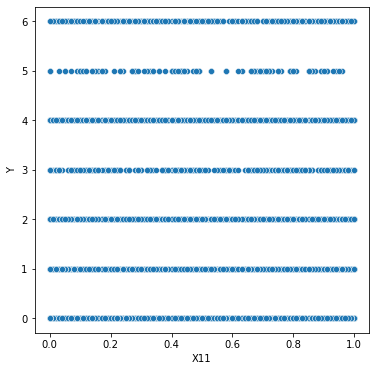

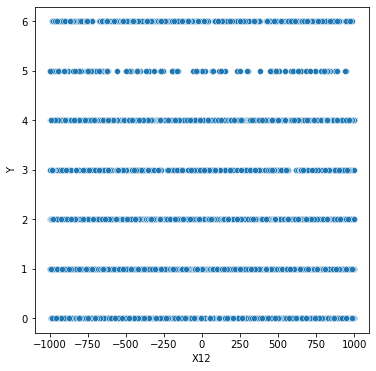

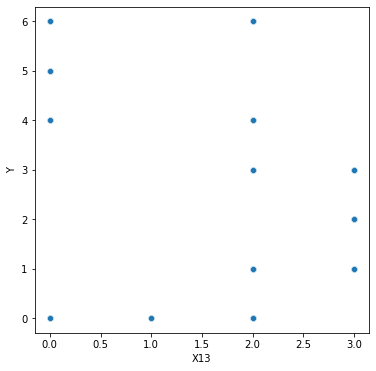

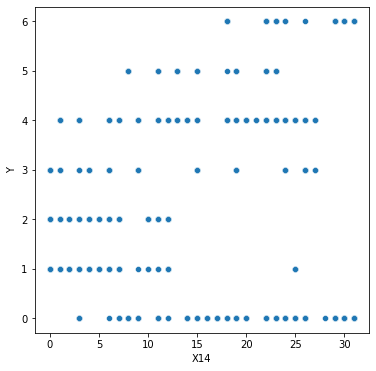

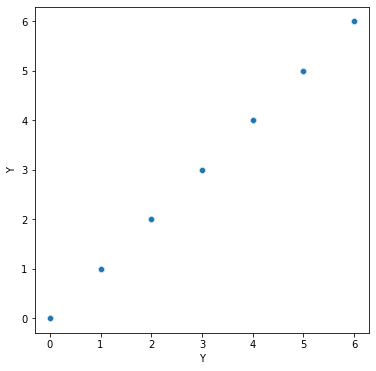

In [18]:
for column in df:
        plt.figure(figsize=(6,6))
        sns.scatterplot(data=df, x=column,y="Y")

From the plots above it seem that the outliers are not error while recording the data because there are no extreme points from the mean directly but rather a natural Increase .

<h3> Feature transformation </h3>

In [19]:
# x=df.iloc[:,:-1].values
# y=df.iloc[:,-1].values

# X_train , X_test , Y_train, Y_test = train_test_split(x,y,test_size=0.20,random_state=0)



# Standard_S = StandardScaler()
# Standard_S.fit(X_train)
# X_train_standard = Standard_S.transform(X_train)
# X_test_standard = Standard_S.transform(X_test)



# minmax_s = MinMaxScaler()

# minmax_s.fit(X_train)

# X_train_minmax = minmax_s.transform(X_train)
# X_test_minmax = minmax_s.transform(X_test)



In [20]:
print(X_train_standard)
print(X_train_minmax)
x

[[-0.67528492 -1.32144042  0.10637909 ...  0.97736064  0.91638837
  -0.68014748]
 [ 0.42229331 -0.29656063  1.54400414 ... -0.71984871  0.10247715
  -0.35726581]
 [-0.1150891   0.4720992   0.99107143 ... -0.44571098  0.10247715
  -1.00302915]
 ...
 [ 0.33864416 -0.51482207  1.65459068 ...  0.41860859 -1.52534528
   1.14951531]
 [-0.67528492  2.03788777 -0.22538053 ... -1.18431135  0.91638837
  -0.78777471]
 [ 1.43875722 -0.95134494 -1.11007287 ... -1.41828877  0.10247715
   1.25714254]]
[[0.27869757 0.00833333 0.34615385 ... 0.7833917  1.         0.19354839]
 [0.51766004 0.30833333 0.59615385 ... 0.29714857 0.66666667 0.29032258]
 [0.40066225 0.53333333 0.5        ... 0.37568784 0.66666667 0.09677419]
 ...
 [0.49944812 0.24444444 0.61538462 ... 0.62331166 0.         0.74193548]
 [0.27869757 0.99166667 0.28846154 ... 0.16408204 1.         0.16129032]
 [0.73896247 0.11666667 0.13461538 ... 0.09704852 0.66666667 0.77419355]]


array([[ 2.709e+03,  5.900e+01,  1.100e+01, ...,  2.690e+02,  0.000e+00,
         2.200e+01],
       [ 2.802e+03,  5.400e+01,  7.000e+00, ...,  1.950e+02,  0.000e+00,
         2.300e+01],
       [ 2.325e+03,  2.800e+01,  1.200e+01, ...,  7.500e+02,  3.000e+00,
         5.000e+00],
       ...,
       [ 2.080e+03,  1.060e+02,  2.400e+01, ..., -7.900e+01,  3.000e+00,
         2.000e+00],
       [ 3.011e+03,  1.080e+02,  1.000e+01, ..., -2.990e+02,  0.000e+00,
         2.200e+01],
       [ 1.980e+03,  3.000e+00,  2.200e+01, ...,  8.090e+02,  3.000e+00,
         0.000e+00]])

<h3> handling imbalanced data </h3>

In [18]:
#pip install imblearn

In [59]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks



In [60]:
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train, Y_train_s1 = resample.fit_resample(X_train, Y_train)


X_train_standard, Y_train_s2 = resample.fit_resample(X_train_standard, Y_train)

#X_train_minmax, Y_train_s3 = resample.fit_resample(X_train_minmax, Y_train)



<AxesSubplot:ylabel='Count'>

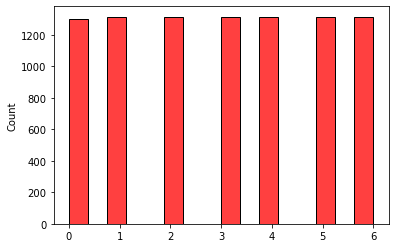

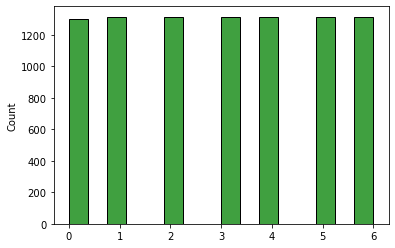

In [61]:
plt.figure()
sns.histplot(x=Y_train_s1,color="r")
plt.figure()
sns.histplot(x=Y_train_s2,color="g")
#plt.figure()
#sns.histplot(x=Y_train_s3)

<h3 > evalution metrics list and justification </h3>

since the problem is multi-class problem i will do <b>macro F1-score</b> and, <b>macro averaged recall</b> and also simple <b>accuracy</b>.
Also a <b>confusion matrix</b> is helpful and since we solved the unbalance problem weighted average is not necessary. 

we are interested in the average because there is no one class that we can call "True vs false" instead we care for the performance of the model performance across all classes. despite what i just said the F1-score is still going to include the precision and recall harmonic mean.

In [23]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,recall_score

<h3> Logistic Regression</h3>

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

<h4> Logistic Regression training and Hyper-parameters tuning with standard Scaling</h4>

In [24]:
penalty = ["l1","l2"]
C= [0.001, 0.01, 0.1, 1, 10, 100]
regr = LogisticRegression()
parameters = dict(C=C,
                      penalty=penalty)

GS = GridSearchCV(regr,parameters)
GS.fit(X_train_standard,Y_train_s2)
best_penalty = GS.best_estimator_.get_params()['penalty']
best_c = GS.best_estimator_.get_params()['C']
print('Best Penalty:', best_penalty)
print('Best C:', best_c)

Best Penalty: l2
Best C: 100


<h4> Logistic Regression training and Hyper-parameters tuning with MinMax Scaling</h4>

In [25]:
penalty = ["l1","l2"]
C= [0.001, 0.01, 0.1, 1, 10, 100]
regr = LogisticRegression()
parameters = dict(C=C,
                      penalty=penalty)

GS = GridSearchCV(regr,parameters)
GS.fit(X_train_minmax,Y_train_s3)
best_penalty1 = GS.best_estimator_.get_params()['penalty']
best_c1 = GS.best_estimator_.get_params()['C']
print('Best Penalty:', best_penalty1)
print('Best C:', best_c1)

Best Penalty: l2
Best C: 100


<h4> Evaluation of Logistic regression on test set</h4>

Metrics for Standard Scaled data:
Accuracy : 0.7482352941176471
  Recall : 0.7757817463857803
 F1-Score 0.6672315560069946


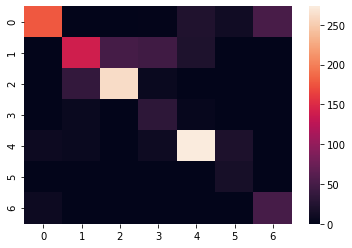

Metrics for minmax Scaled data:
Accuracy : 0.7419607843137255
  Recall : 0.7707977461101798
 F1-Score 0.6608577568844163


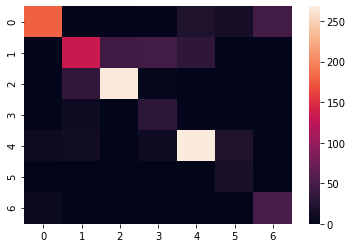

In [26]:
#Standard scling
regr1 = LogisticRegression(penalty=best_penalty,C=best_c)

regr1.fit(X_train_standard,Y_train_s2)
#minmax scaling
regr2 = LogisticRegression(penalty=best_penalty1,C=best_c1)
regr2.fit(X_train_minmax,Y_train_s3)

Y_pred_standard = regr1.predict(X_test_standard)
Y_pred_minmax = regr2.predict(X_test_minmax)


print("Metrics for Standard Scaled data:")
print("Accuracy : {}\n  Weighted F1-score : {}\n Macro F1-Score {}".format(accuracy_score(Y_test,Y_pred_standard),f1_score(Y_test,Y_pred_standard,average="weighted"),f1_score(Y_test,Y_pred_standard,average="macro")))
plt.figure()
sns.heatmap(confusion_matrix(Y_test,Y_pred_standard))
plt.show()
print("Metrics for minmax Scaled data:")
print("Accuracy : {}\n Weighted F1-score : {}\n Macro F1-Score {}".format(accuracy_score(Y_test,Y_pred_minmax),f1_score(Y_test,Y_pred_minmax,average="weighted"),f1_score(Y_test,Y_pred_minmax,average="macro")))
plt.figure()
sns.heatmap(confusion_matrix(Y_test,Y_pred_minmax))
plt.show()


<h3> SVM </h3>

<h4> SVM training and Hyper-parameters tuning with standard scaling </h4>

In [27]:
kernels =["linear","rbf","poly","sigmoid"]
C=[1, 10, 100, 1000]
svm = SVC()

param = dict(kernel=kernels,C=C)
            

GS_svm = GridSearchCV(svm,param)

GS_svm.fit(X_train_standard,Y_train_s2)
best_kernel = GS_svm.best_estimator_.get_params()['kernel']
best_C = GS_svm.best_estimator_.get_params()['C']
print('Best Kernel:', best_kernel)
print('Best C:', best_C)


Best Kernel: rbf
Best C: 100


<h4> SVM training and Hyper-parameters tuning with MinMax scaling</h4>

In [28]:
kernels =["linear","rbf","poly","sigmoid"]
C=[1, 10, 100, 1000]
svm = SVC()

param = dict(kernel=kernels,C=C)
            

GS_svm = GridSearchCV(svm,param)

GS_svm.fit(X_train_minmax,Y_train_s3)
best_kernel1 = GS_svm.best_estimator_.get_params()['kernel']
best_C1 = GS_svm.best_estimator_.get_params()['C']
print('Best Kernel:', best_kernel1)
print('Best C:', best_C1)


Best Kernel: rbf
Best C: 1000


<h4> Evalution of SVM on the Test set </h4>

Metrics for Standard Scaled data:
Accuracy : 0.88
  Recall : 0.8220442389681624
 F1-Score 0.821031366502714


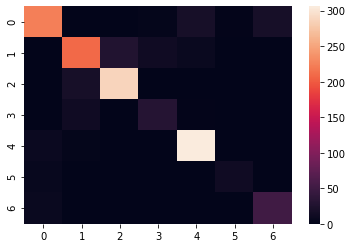

Metrics for minmax Scaled data:
Accuracy : 0.8698039215686274
  Recall : 0.8256038719276957
 F1-Score 0.819999314132993


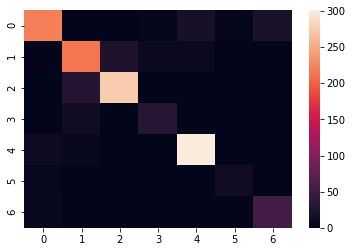

In [29]:
#for standard scaled data
svm1 = SVC(kernel=best_kernel,C=best_C)
svm1.fit(X_train_standard,Y_train_s2)
#for min max scaled data 
svm2 = SVC(kernel=best_kernel1,C=best_C1)
svm2.fit(X_train_minmax,Y_train_s3)

Y_pred_standard = svm1.predict(X_test_standard)
Y_pred_minmax = svm2.predict(X_test_minmax)


print("Metrics for Standard Scaled data:")
print("Accuracy : {}\n  Weighted F1-score : {}\n Macro F1-Score {}".format(accuracy_score(Y_test,Y_pred_standard),f1_score(Y_test,Y_pred_standard,average="weighted"),f1_score(Y_test,Y_pred_standard,average="macro")))
plt.figure()
sns.heatmap(confusion_matrix(Y_test,Y_pred_standard))
plt.show()
print("Metrics for minmax Scaled data:")
print("Accuracy : {}\n Weighted F1-score : {}\n Macro F1-Score {}".format(accuracy_score(Y_test,Y_pred_minmax),f1_score(Y_test,Y_pred_minmax,average="weighted"),f1_score(Y_test,Y_pred_minmax,average="macro")))
plt.figure()
sns.heatmap(confusion_matrix(Y_test,Y_pred_minmax))
plt.show()

<h3> Decision tree </h3>

In [69]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
tree = DecisionTreeClassifier()

GS_tree = GridSearchCV(tree,params)
GS_tree.fit(X_train,Y_train_s1)

best_depth = GS_tree.best_estimator_.get_params()["max_depth"]
best_samples = GS_tree.best_estimator_.get_params()['min_samples_leaf']
best_crit = GS_tree.best_estimator_.get_params()['criterion']
print('Best max depth:', best_depth)
print('Best best minimum samples in a leaf:', best_samples)
print('Best criterion:',best_crit)


Best max depth: 20
Best best minimum samples in a leaf: 5
Best criterion: entropy


Metrics:
Accuracy : 0.8933333333333333
 Weighted F1-score : 0.8942297992874451
 Macro F1-Score 0.8526729600664641


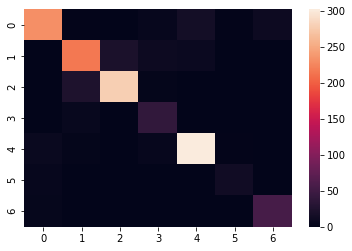

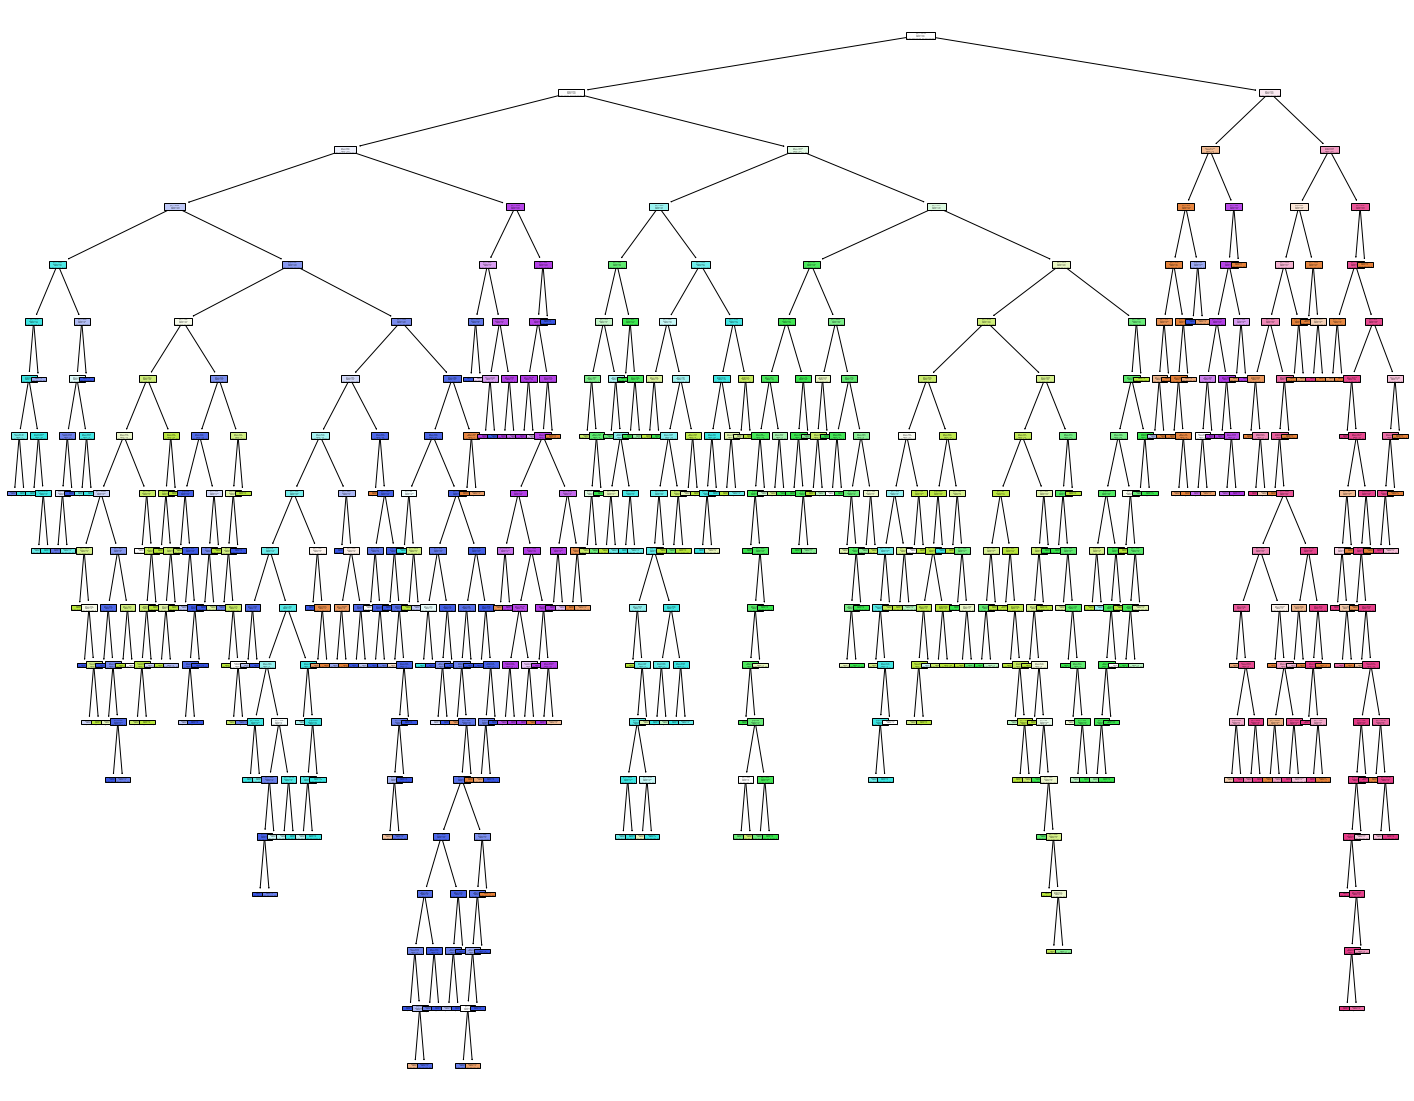

In [70]:
tree1 = DecisionTreeClassifier(criterion=best_crit,min_samples_leaf=best_samples,max_depth=best_depth)
tree1.fit(X_train,Y_train_s1)
Y_pred = tree1.predict(X_test)


print("Metrics:")
print("Accuracy : {}\n Weighted F1-score : {}\n Macro F1-Score {}".format(accuracy_score(Y_test,Y_pred),f1_score(Y_test,Y_pred,average="weighted"),f1_score(Y_test,Y_pred,average="macro")))
plt.figure()
sns.heatmap(confusion_matrix(Y_test,Y_pred))
plt.show()

from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree1,filled=True)

<h3> Random Forest Classifier </h3>

In [67]:
params = {
    'n_estimators':[20,40,60,80,100],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
trees = RandomForestClassifier()

GS_tree = GridSearchCV(trees,params)
GS_tree.fit(X_train,Y_train_s1)

best_n = GS_tree.best_estimator_.get_params()["n_estimators"]
best_depth = GS_tree.best_estimator_.get_params()["max_depth"]
best_samples = GS_tree.best_estimator_.get_params()['min_samples_leaf']
best_crit = GS_tree.best_estimator_.get_params()['criterion']
print('Best number of estimators',best_n)
print('Best max depth:', best_depth)
print('Best best minimum samples in a leaf:', best_samples)
print('Best criterion:',best_crit)


Best number of estimators 100
Best max depth: 20
Best best minimum samples in a leaf: 5
Best criterion: entropy


In [68]:
trees1 = RandomForestClassifier(n_estimators=100,criterion="entropy",min_samples_leaf=5,max_depth=20)

trees1.fit(X_train,Y_train_s1)
Y_pred = trees1.predict(X_test)
print("Metrics:")
print("Accuracy : {}\nWeighted F1-score : {}\nMacro F1-Score {}".format(accuracy_score(Y_test,Y_pred),f1_score(Y_test,Y_pred,average="weighted"),f1_score(Y_test,Y_pred,average="macro")))

print(confusion_matrix(Y_test,Y_pred))


Metrics:
Accuracy : 0.9129411764705883
Weighted F1-score : 0.9131901381554732
Macro F1-Score 0.8720554564252383
[[227   1   0   3  21   4  11]
 [  0 224  18   7   9   0   0]
 [  0  11 293   2   0   0   0]
 [  0   8   1  36   1   0   0]
 [  1   3   0   1 310   5   0]
 [  1   0   0   0   0  17   0]
 [  3   0   0   0   0   0  57]]


<h3> Error analysis </h3> 

In [52]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       267
           1       0.92      0.86      0.89       258
           2       0.93      0.97      0.95       306
           3       0.73      0.80      0.76        46
           4       0.92      0.97      0.94       320
           5       0.63      0.94      0.76        18
           6       0.85      0.97      0.91        60

    accuracy                           0.92      1275
   macro avg       0.85      0.91      0.87      1275
weighted avg       0.92      0.92      0.92      1275



<b>We can see from the classification report above that the number of actual appearances (Support) of the classes that has lower True positive in the Confusion matrix is low so our model is doing great the problem is from the unseen data it has lower number of appearances of lower classes.

Also we can see the weighted average is more suitable in this case.<b>

<h3> SVM and Decision Tree With dimensonalty reduction </h3>

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(X_train_standard)
X_train_standard_transformed = pca.transform(X_train_standard)



array([-2.01656821, -0.45662676, -0.38090117,  0.15787358, -0.51553882,
        0.89033446, -0.44736813,  0.33238946,  1.40994287, -0.34318367])

In [67]:
X_test_standard_transformed = pca.transform(X_test_standard)

Metrics:
Accuracy : 0.8384313725490196
  Recall : 0.78848646944965
 F1-Score 0.7836060029487186


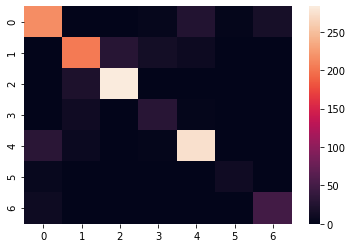

In [72]:
svm = SVC(kernel='rbf',C=10)
svm.fit(X_train_standard_transformed,Y_train_s2)
Y_pred = svm.predict(X_test_standard_transformed)

print("Metrics:")
print("Accuracy : {}\n  Recall : {}\n F1-Score {}".format(accuracy_score(Y_test,Y_pred),recall_score(Y_test,Y_pred,average="macro"),f1_score(Y_test,Y_pred,average="macro")))
plt.figure()
sns.heatmap(confusion_matrix(Y_test,Y_pred))
plt.show()



Metrics:
Accuracy : 0.7505882352941177
  Recall : 0.7398528018367381
 F1-Score 0.701533657215827


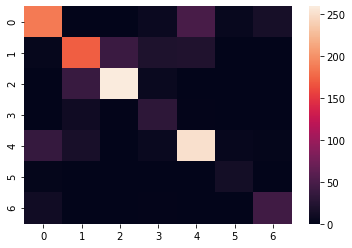

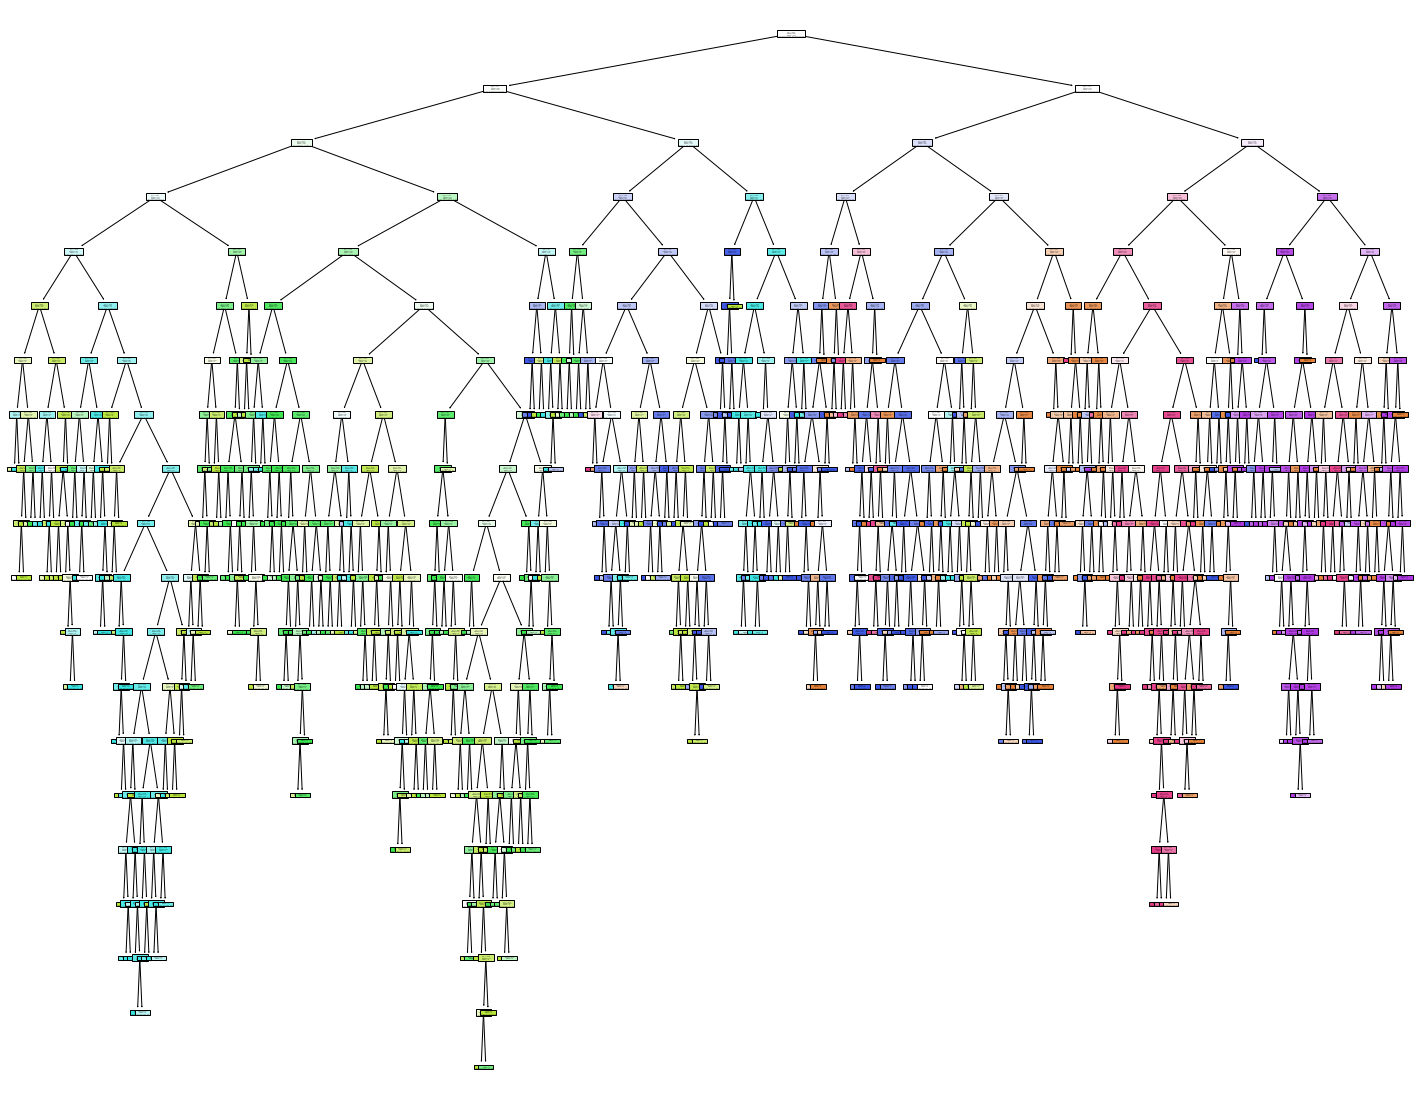

In [73]:
tree = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=5,max_depth=20)
tree.fit(X_train_standard_transformed,Y_train_s2)
Y_pred = tree.predict(X_test_standard_transformed)

print("Metrics:")
print("Accuracy : {}\n  Recall : {}\n F1-Score {}".format(accuracy_score(Y_test,Y_pred),recall_score(Y_test,Y_pred,average="macro"),f1_score(Y_test,Y_pred,average="macro")))
plt.figure()
sns.heatmap(confusion_matrix(Y_test,Y_pred))
plt.show()

fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree,filled=True)

<b> we can see that the dimensionality reduction is not a good option with our data and the explained varinece is low <b>